In [2]:
library(dplyr)

# Niveau 1 : réflectance de surface

In [30]:
library(readxl)
data <- read_excel(
    path = "Desktop\\Memoire\\bases_de_donnees\\jeux_donnees\\i_SR.xlsx",
    sheet = 4, # 1 = hastière, 2 = andenne, 3 = lixhe, 4 = tout
    col_names = TRUE)
head(data,2)

date,Turbidité,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12
2017-04-03,7.188,53.5,174.5,354.5,231.5,204.0,110.5,125.5,132.0,129,103,144.5,101.0
2017-05-26,2.969,294.0,228.5,305.0,193.5,150.5,37.0,51.5,54.5,71,190,224.0,182.5


In [19]:
#hastière
data <- mutate(data,
               P1 = 0.40*B1 + 0.46*B2 + 0.46*B3 + 0.46*B4 + 0.46* B5,
               P2 = 0.89*B1 - 0.06*B2 - 0.32*B3 - 0.29*B4 - 0.11*B5,
               P3 = -0.02*B1 - 0.51*B2 - 0.42*B3 + 0.24*B4 + 0.71*B5)
head(data,2)

date,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,Turbidité,P1,P2,P3
2017-04-03,53.5,174.5,354.5,231.5,204.0,110.5,125.5,132.0,129,103,144.5,101.0,7.188,465.07,-165.87,-38.555
2017-05-26,294.0,228.5,305.0,193.5,150.5,37.0,51.5,54.5,71,190,224.0,182.5,2.969,521.25,77.68,-97.220


In [23]:
#andenne
data <- mutate(data,
               P1 = - 0.39 * B1 - 0.46 * B2 - 0.47 * B3 - 0.46 * B4 - 0.45 * B5,
              P2 = 0.86*B1 + 0.08*B2 - 0.16*B3 - 0.34*B4 - 0.33*B5,
              P3 = 0.30*B1 - 0.68*B2 - 0.33*B3 + 0.21*B4 + 0.55*B5)

In [27]:
#lixhe
data <- mutate(data,
               P1 = - 0.41 * B1 - 0.46 * B2 - 0.46 * B3 - 0.46 * B4 - 0.45 * B5,
               P2 = 0.80*B1 + 0.18*B2 - 0.12*B3 - 0.39*B4 - 0.40*B5,
               P3 = 0.37*B1 - 0.46*B2 - 0.55*B3 + 0.11*B4 + 0.58*B5)

In [31]:
#tout
data <- mutate(data,
               P1 = 0.41 * B1 + 0.46 * B2 + 0.46 * B3 + 0.46 * B4 + 0.45 * B5,
               P2 = 0.85*B1 + 0.08*B2 - 0.14*B3 - 0.37*B4 - 0.35*B5,
               P3 = -0.27*B1 + 0.46*B2 + 0.54*B3 - 0.13*B4 - 0.64*B5)

In [32]:
data$l.Turbidité <- log10(data$Turbidité)
model <- l.Turbidité ~ P1 + P2
fit <- lm(model, data)
summ <- summary(fit)
summ
mean(summ$residuals^2)
BIC(fit)
sqrt(mean(summ$residuals^2))
anova(fit)
coefficients(fit)


Call:
lm(formula = model, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0106 -0.1526  0.0307  0.1994  0.7279 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.210e-01  6.532e-02   4.914 3.30e-06 ***
P1           4.631e-04  9.253e-05   5.004 2.27e-06 ***
P2          -1.579e-03  3.719e-04  -4.245 4.73e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3172 on 105 degrees of freedom
Multiple R-squared:  0.3536,	Adjusted R-squared:  0.3413 
F-statistic: 28.72 on 2 and 105 DF,  p-value: 1.124e-10


[1] 0.09780155

[1] 74.13925

[1] 0.3127324

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
P1,1,3.965760,3.9657600,39.42269,7.827362e-09
P2,1,1.812776,1.8127757,18.02038,4.731025e-05
Residuals,105,10.562568,0.1005959,NA,NA


(Intercept)            P1            P2 
 0.3210172246  0.0004630529 -0.0015787211

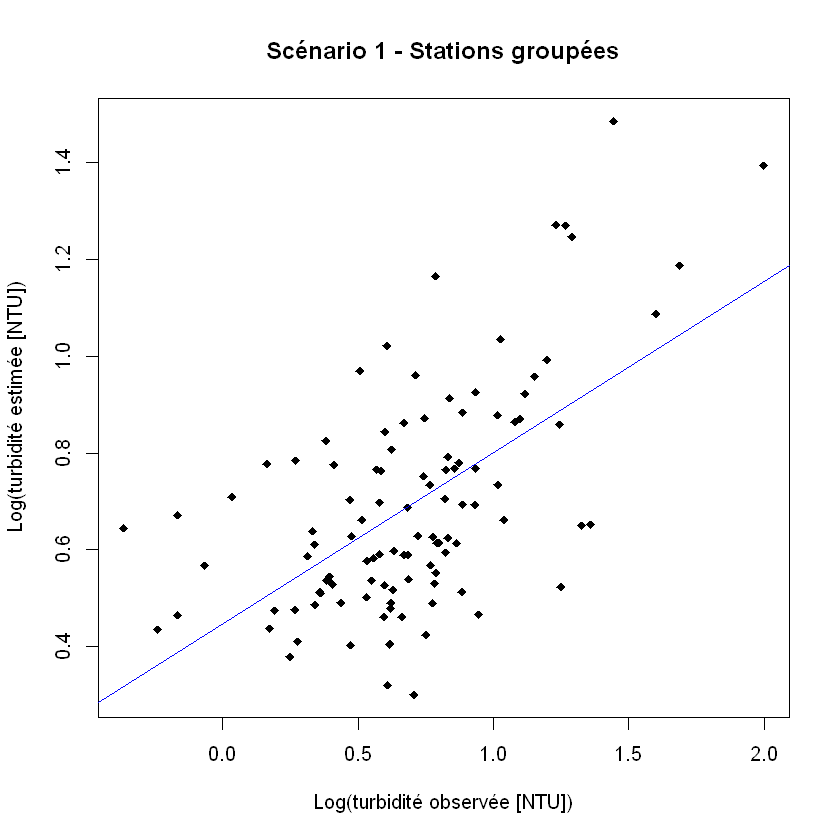

In [33]:
ybis = 0.000463052854681846 *data$P1 -0.0015787210820672 * data$P2 + 0.321017224553145
y = ybis
x = data$l.Turbidité
plot(x, y,
  ylab="Log(turbidité estimée [NTU])",
  xlab="Log(turbidité observée [NTU])",
     main = "Scénario 1 - Stations groupées",
    pch = 18)
abline(lm(y ~ x), col="blue")

# Niveau 2 : débit

# Hastière

In [39]:
library(readxl)
data <- read_excel(
    path = "Desktop\\Memoire\\bases_de_donnees\\jeux_donnees\\vi_SR_débit_précip.xlsx",
    sheet = 1, # 1 = hastière, 2 = andenne, 3 = lixhe, 5 = tout
    col_names = TRUE)
data = subset(data, select = -c(date,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,Précipitations))
head(data,2)

Turbidité,Débit
7.188,92.46
2.969,31.33


In [35]:
data$l.Turbidité <- log10(data$Turbidité)
data$log.Débit <- log10(data$Débit)
head(data,2)
model <- l.Turbidité ~ log.Débit
fit <- lm(model, data)
summ <- summary(fit)
summ
mean(summ$residuals^2)
BIC(fit)
sqrt(mean(summ$residuals^2))

Turbidité,Débit,l.Turbidité,log.Débit
7.188,92.46,0.8566081,1.965954
2.969,31.33,0.4726102,1.495960



Call:
lm(formula = model, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.313373 -0.063356 -0.003664  0.098264  0.286329 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.05942    0.10715  -0.555    0.583    
log.Débit    0.54224    0.06171   8.787 2.23e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1346 on 35 degrees of freedom
Multiple R-squared:  0.6881,	Adjusted R-squared:  0.6792 
F-statistic: 77.21 on 1 and 35 DF,  p-value: 2.232e-10


[1] 0.01713444

[1] -34.6324

[1] 0.1308986

In [36]:
anova(fit)
coefficients(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
log.Débit,1,1.3984744,1.39847439,77.206,2.232136e-10
Residuals,35,0.6339741,0.01811355,NA,NA


(Intercept)   log.Débit 
-0.05941518  0.54224364

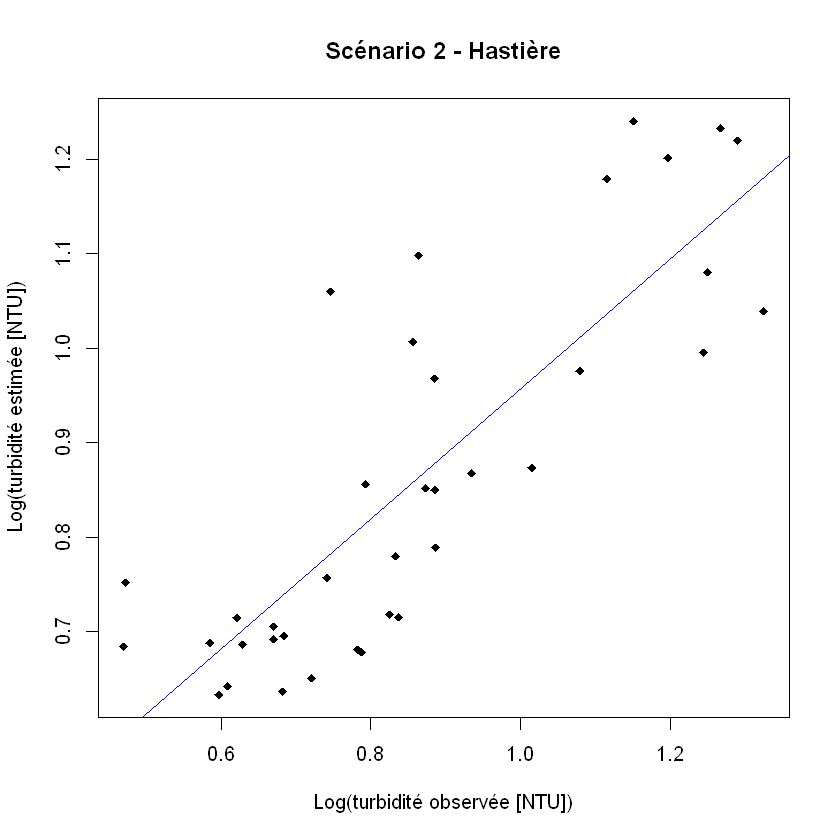

In [37]:
ybis = 0.542243639978675 *data$log.Débit -0.059415181039148
y1 = ybis
x1 = data$l.Turbidité
plot(x1, y1,
  ylab="Log(turbidité estimée [NTU])",
  xlab="Log(turbidité observée [NTU])",
     main = "Scénario 2 - Hastière",
    pch = 18)
abline(lm(y1 ~ x1), col="blue")
#coeff=coefficients(fit)
#eq = paste0("y = ", round(coeff[2],1), "*x ", round(coeff[1],1))

In [23]:
#model <- l.Turbidité ~ log.Débit
#sat.lm0 <- lm(model, data)
#summary(sat.lm0)
#sat.sse0 <- sum(resid(sat.lm0) ^2)
#AIC(sat.lm0, k = 2)
#AIC(sat.lm0)
#BIC(sat.lm0)

# Andenne

In [40]:
library(readxl)
data <- read_excel(
    path = "Desktop\\Memoire\\bases_de_donnees\\jeux_donnees\\vi_SR_débit_précip.xlsx",
    sheet = 2, # 1 = hastière, 2 = andenne, 3 = lixhe, 5 = tout
    col_names = TRUE)
data = subset(data, select = -c(MOY,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,Précipitations))
head(data,2)

Turbidité,Débit
4.850,129.71
5.088,73.83


In [41]:
data$l.Turbidité <- log10(data$Turbidité)
data$log.Débit <- log10(data$Débit)
model <- l.Turbidité ~ log.Débit
fit <- lm(model, data)
summ <- summary(fit)
summ
mean(summ$residuals^2)
BIC(fit)
sqrt(mean(summ$residuals^2))
anova(fit)
coefficients(fit)


Call:
lm(formula = model, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.79558 -0.23201  0.05418  0.25952  0.57065 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.1355     0.3477  -3.266   0.0028 ** 
log.Débit     0.9826     0.1796   5.470 6.88e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3465 on 29 degrees of freedom
Multiple R-squared:  0.5078,	Adjusted R-squared:  0.4908 
F-statistic: 29.92 on 1 and 29 DF,  p-value: 6.88e-06


[1] 0.1123164

[1] 30.49664

[1] 0.3351363

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
log.Débit,1,3.592072,3.5920723,29.9184,6.87985e-06
Residuals,29,3.481807,0.1200623,NA,NA


(Intercept)   log.Débit 
 -1.1354571   0.9826407

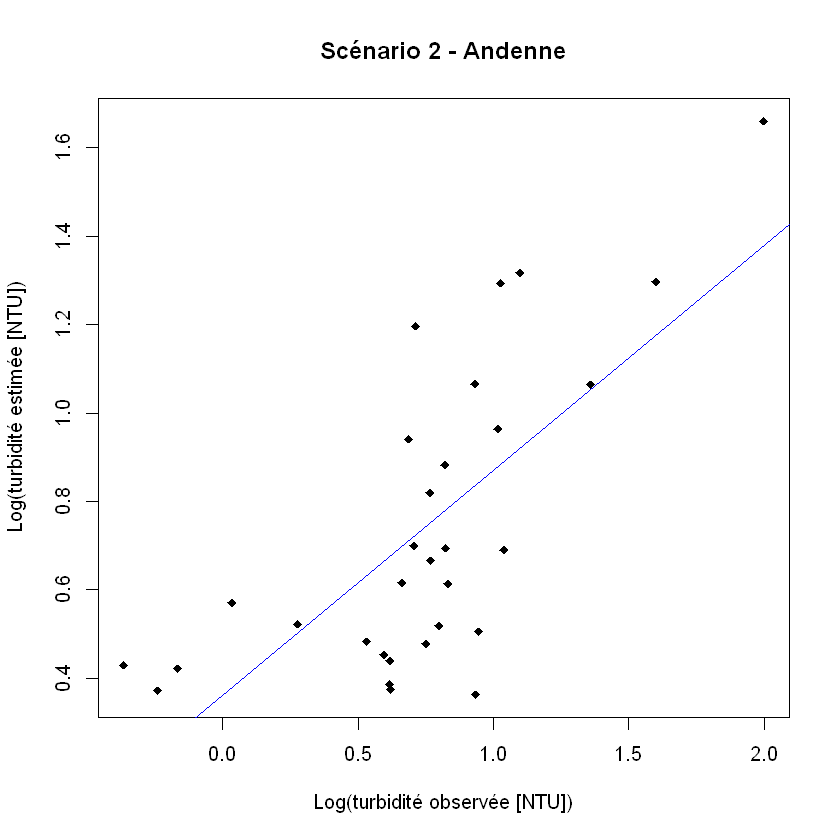

In [43]:
ybis = 0.982640748702559 *data$log.Débit -1.13545710887282
y1 = ybis
x1 = data$l.Turbidité
plot(x1, y1,
  ylab="Log(turbidité estimée [NTU])",
  xlab="Log(turbidité observée [NTU])",
     main = "Scénario 2 - Andenne",
    pch = 18)
abline(lm(y1 ~ x1), col="blue")

# Lixhe

In [44]:
library(readxl)
data <- read_excel(
    path = "Desktop\\Memoire\\bases_de_donnees\\jeux_donnees\\vi_SR_débit_précip.xlsx",
    sheet = 3, # 1 = hastière, 2 = andenne, 3 = lixhe, 5 = tout
    col_names = TRUE)
data = subset(data, select = -c(date,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,Précipitations))
head(data,2)

Turbidité,Débit
0.681,53.89304
0.856,55.47750


In [45]:
data$l.Turbidité <- log10(data$Turbidité)
data$log.Débit <- log10(data$Débit)
model <- l.Turbidité ~ log.Débit
fit <- lm(model, data)
summ <- summary(fit)
summ
mean(summ$residuals^2)
BIC(fit)
sqrt(mean(summ$residuals^2))
anova(fit)
coefficients(fit)


Call:
lm(formula = model, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.61002 -0.17213 -0.07672  0.22295  0.73450 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.25550    0.18156  -1.407 0.167472    
log.Débit    0.40350    0.09396   4.294 0.000117 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2863 on 38 degrees of freedom
Multiple R-squared:  0.3267,	Adjusted R-squared:  0.309 
F-statistic: 18.44 on 1 and 38 DF,  p-value: 0.0001169


[1] 0.07788679

[1] 22.48177

[1] 0.2790821

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
log.Débit,1,1.511822,1.5118223,18.43998,0.0001168711
Residuals,38,3.115472,0.0819861,NA,NA


(Intercept)   log.Débit 
 -0.2555016   0.4035001

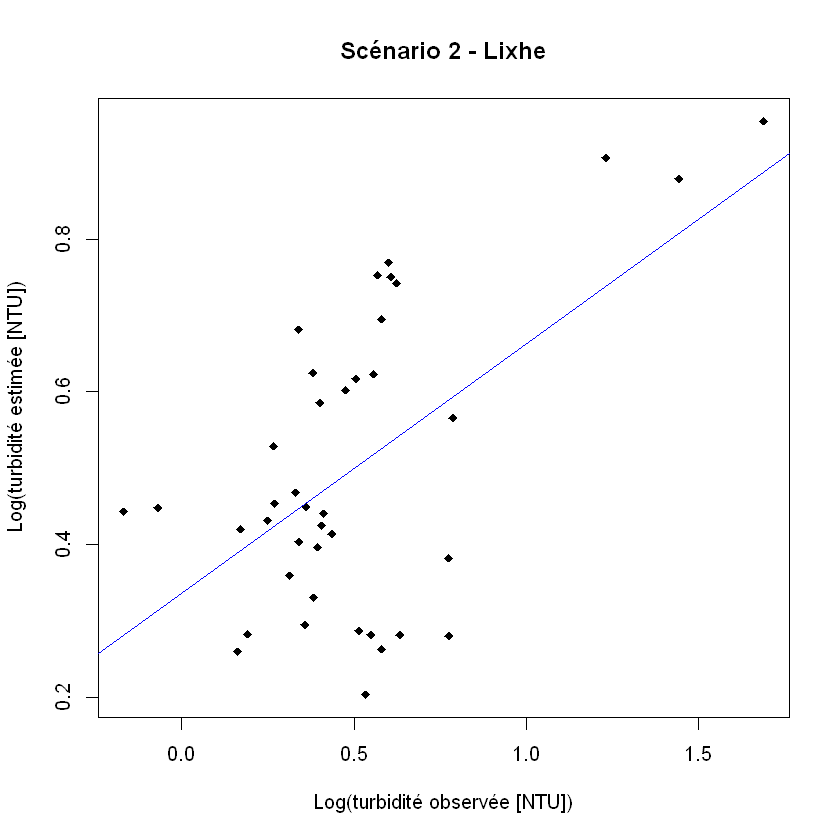

In [46]:
ybis = 0.403500071066787 *data$log.Débit -0.255501629809784
y1 = ybis
x1 = data$l.Turbidité
plot(x1, y1,
  ylab="Log(turbidité estimée [NTU])",
  xlab="Log(turbidité observée [NTU])",
     main = "Scénario 2 - Lixhe",
    pch = 18)
abline(lm(y1 ~ x1), col="blue")

# Stations groupées

In [47]:
library(readxl)
data <- read_excel(
    path = "Desktop\\Memoire\\bases_de_donnees\\jeux_donnees\\vi_SR_débit_précip.xlsx",
    sheet = 4, # 1 = hastière, 2 = andenne, 3 = lixhe, 4 = tout
    col_names = TRUE)
data = subset(data, select = -c(date,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,Précipitations))
head(data,2)

Turbidité,Débit
7.188,92.46
2.969,31.33


In [48]:
data$l.Turbidité <- log10(data$Turbidité)
data$log.Débit <- log10(data$Débit)
model <- l.Turbidité ~ log.Débit
fit <- lm(model, data)
summ <- summary(fit)
summ
mean(summ$residuals^2)
BIC(fit)
sqrt(mean(summ$residuals^2))
anova(fit)
coefficients(fit)


Call:
lm(formula = model, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.94728 -0.24704  0.06771  0.24976  0.81697 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.18284    0.14595  -1.253    0.213    
log.Débit    0.47992    0.07812   6.143 1.44e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3372 on 106 degrees of freedom
Multiple R-squared:  0.2626,	Adjusted R-squared:  0.2556 
F-statistic: 37.74 on 1 and 106 DF,  p-value: 1.437e-08


[1] 0.1115793

[1] 83.69095

[1] 0.3340348

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
log.Débit,1,4.290543,4.2905427,37.74078,1.437035e-08
Residuals,106,12.050561,0.1136845,NA,NA


(Intercept)   log.Débit 
 -0.1828445   0.4799229

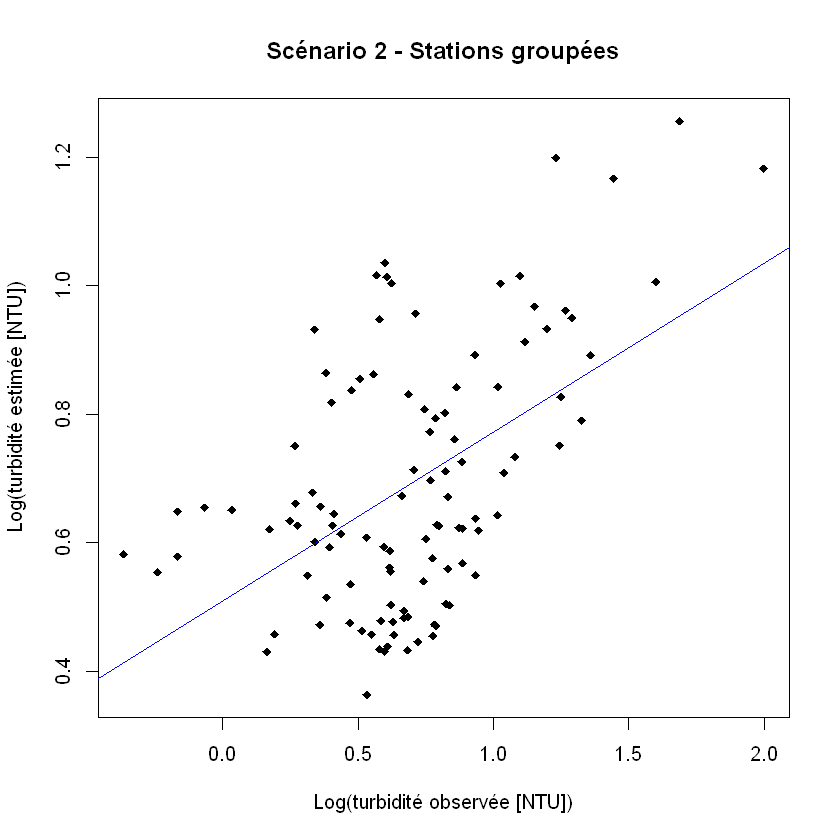

In [49]:
ybis = 0.47992285575744 *data$log.Débit -0.182844543331383
y1 = ybis
x1 = data$l.Turbidité
plot(x1, y1,
  ylab="Log(turbidité estimée [NTU])",
  xlab="Log(turbidité observée [NTU])",
     main = "Scénario 2 - Stations groupées",
    pch = 18)
abline(lm(y1 ~ x1), col="blue")

# Niveau 3 :  précipitations

# Hastière

In [50]:
library(readxl)
data <- read_excel(
    path = "Desktop\\Memoire\\bases_de_donnees\\jeux_donnees\\vi_SR_débit_précip.xlsx",
    sheet = 1, # 1 = hastière, 2 = andenne, 3 = lixhe, 5 = tout
    col_names = TRUE)
data = subset(data, select = -c(date,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12))
head(data,2)

Turbidité,Débit,Précipitations
7.188,92.46,4.6
2.969,31.33,0.0


In [51]:
data$l.Turbidité <- log10(data$Turbidité)
model <- l.Turbidité ~ Précipitations
fit <- lm(model, data)
summ <- summary(fit)
summ
mean(summ$residuals^2)
BIC(fit)
sqrt(mean(summ$residuals^2))
anova(fit)
coefficients(fit)


Call:
lm(formula = model, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.39878 -0.18579 -0.00774  0.14591  0.45797 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.869826   0.046303  18.785   <2e-16 ***
Précipitations -0.001314   0.003938  -0.334    0.741    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2406 on 35 degrees of freedom
Multiple R-squared:  0.003171,	Adjusted R-squared:  -0.02531 
F-statistic: 0.1114 on 1 and 35 DF,  p-value: 0.7406


[1] 0.05475683

[1] 8.354637

[1] 0.2340018

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Précipitations,1,0.006445844,0.006445844,0.1113545,0.7405984
Residuals,35,2.026002651,0.057885790,NA,NA


(Intercept) Précipitations 
   0.869825683   -0.001314008

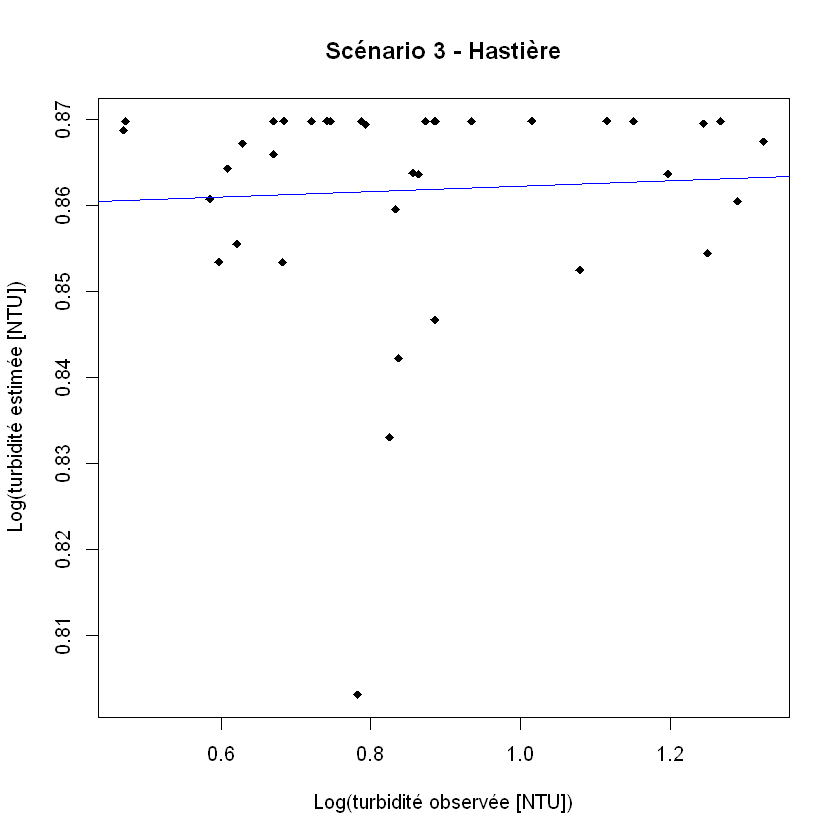

In [52]:
ybis = -0.00131400773872193 *data$Précipitations + 0.869825683326001
y1 = ybis
x1 = data$l.Turbidité
plot(x1, y1,
  ylab="Log(turbidité estimée [NTU])",
  xlab="Log(turbidité observée [NTU])",
     main = "Scénario 3 - Hastière",
    pch = 18)
abline(lm(y1 ~ x1), col="blue")

# Andenne

In [53]:
library(readxl)
data <- read_excel(
    path = "Desktop\\Memoire\\bases_de_donnees\\jeux_donnees\\vi_SR_débit_précip.xlsx",
    sheet = 2, # 1 = hastière, 2 = andenne, 3 = lixhe, 5 = tout
    col_names = TRUE)
data = subset(data, select = -c(MOY,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12))
head(data,2)

Turbidité,Débit,Précipitations
4.850,129.71,3.9
5.088,73.83,9.8


In [54]:
data$l.Turbidité <- log10(data$Turbidité)
model <- l.Turbidité ~ Précipitations
fit <- lm(model, data)
summ <- summary(fit)
summ
mean(summ$residuals^2)
BIC(fit)
sqrt(mean(summ$residuals^2))
anova(fit)
coefficients(fit)


Call:
lm(formula = model, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.96091 -0.20826 -0.01429  0.31841  1.01127 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.59539    0.10157   5.862 2.33e-06 ***
Précipitations  0.02549    0.01102   2.313    0.028 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4538 on 29 degrees of freedom
Multiple R-squared:  0.1557,	Adjusted R-squared:  0.1266 
F-statistic: 5.348 on 1 and 29 DF,  p-value: 0.02804


[1] 0.1926617

[1] 47.22475

[1] 0.4389325

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Précipitations,1,1.101366,1.1013656,5.347765,0.02804489
Residuals,29,5.972514,0.2059488,NA,NA


(Intercept) Précipitations 
    0.59538949     0.02549389

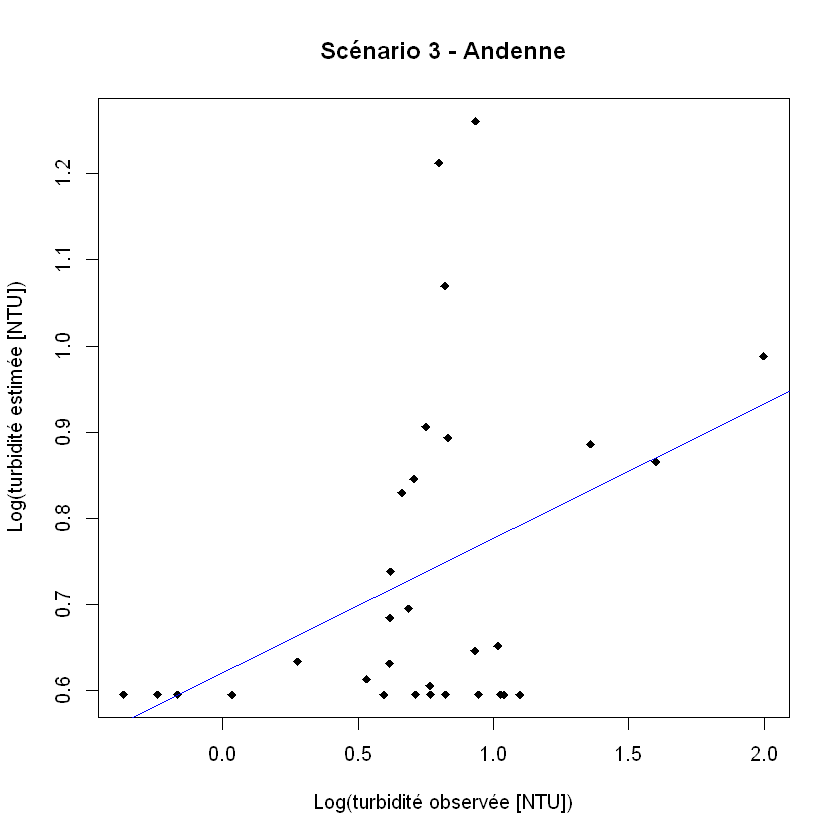

In [55]:
ybis = 0.0254938855807666 *data$Précipitations + 0.595389488112999
y1 = ybis
x1 = data$l.Turbidité
plot(x1, y1,
  ylab="Log(turbidité estimée [NTU])",
  xlab="Log(turbidité observée [NTU])",
     main = "Scénario 3 - Andenne",
    pch = 18)
abline(lm(y1 ~ x1), col="blue")

# Lixhe

In [56]:
library(readxl)
data <- read_excel(
    path = "Desktop\\Memoire\\bases_de_donnees\\jeux_donnees\\vi_SR_débit_précip.xlsx",
    sheet = 3, # 1 = hastière, 2 = andenne, 3 = lixhe, 5 = tout
    col_names = TRUE)
data = subset(data, select = -c(date,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12))
head(data,2)

Turbidité,Débit,Précipitations
0.681,53.89304,4.0
0.856,55.47750,18.6


In [57]:
data$l.Turbidité <- log10(data$Turbidité)
model <- l.Turbidité ~ Précipitations
fit <- lm(model, data)
summ <- summary(fit)
summ
mean(summ$residuals^2)
BIC(fit)
sqrt(mean(summ$residuals^2))
anova(fit)
coefficients(fit)


Call:
lm(formula = model, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.82454 -0.14069 -0.03057  0.14319  0.82907 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.416543   0.061351   6.789 4.75e-08 ***
Précipitations 0.018305   0.007442   2.460   0.0186 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3241 on 38 degrees of freedom
Multiple R-squared:  0.1373,	Adjusted R-squared:  0.1146 
F-statistic:  6.05 on 1 and 38 DF,  p-value: 0.01857


[1] 0.09979444

[1] 32.39601

[1] 0.3159026

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Précipitations,1,0.6355166,0.6355166,6.049843,0.01857079
Residuals,38,3.9917776,0.1050468,NA,NA


(Intercept) Précipitations 
    0.41654250     0.01830482

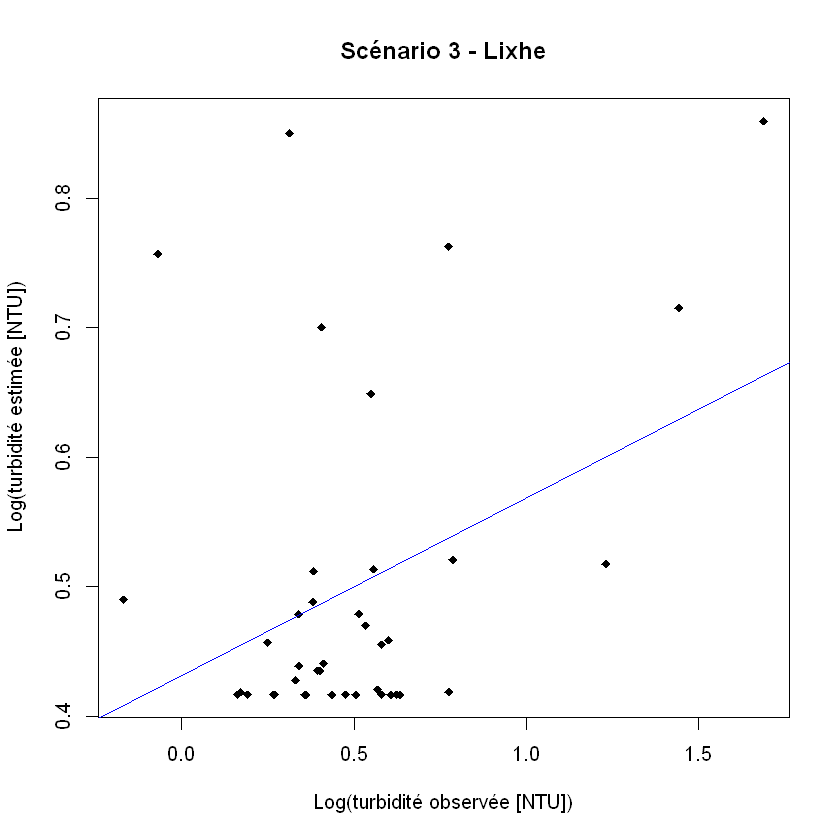

In [58]:
ybis = 0.0183048222601186 *data$Précipitations + 0.416542502584499
y1 = ybis
x1 = data$l.Turbidité
plot(x1, y1,
  ylab="Log(turbidité estimée [NTU])",
  xlab="Log(turbidité observée [NTU])",
     main = "Scénario 3 - Lixhe",
    pch = 18)
abline(lm(y1 ~ x1), col="blue")

# Stations groupées

In [59]:
library(readxl)
data <- read_excel(
    path = "Desktop\\Memoire\\bases_de_donnees\\jeux_donnees\\vi_SR_débit_précip.xlsx",
    sheet = 4, # 1 = hastière, 2 = andenne, 3 = lixhe, 4 = tout
    col_names = TRUE)
data = subset(data, select = -c(date,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12))
head(data,2)

Turbidité,Débit,Précipitations
7.188,92.46,4.6
2.969,31.33,0.0


In [60]:
data$l.Turbidité <- log10(data$Turbidité)
data$log.Débit <- log10(data$Débit)
model <- l.Turbidité ~ Précipitations
fit <- lm(model, data)
summ <- summary(fit)
summ
mean(summ$residuals^2)
BIC(fit)
sqrt(mean(summ$residuals^2))
anova(fit)
coefficients(fit)


Call:
lm(formula = model, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.99571 -0.20086 -0.03121  0.18314  1.19300 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.630190   0.043664  14.433   <2e-16 ***
Précipitations 0.011433   0.004436   2.578   0.0113 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3809 on 106 degrees of freedom
Multiple R-squared:  0.05898,	Adjusted R-squared:  0.05011 
F-statistic: 6.644 on 1 and 106 DF,  p-value: 0.01132


[1] 0.1423818

[1] 110.0188

[1] 0.3773351

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Précipitations,1,0.9638721,0.9638721,6.644268,0.01132132
Residuals,106,15.3772313,0.1450682,NA,NA


(Intercept) Précipitations 
    0.63019049     0.01143337

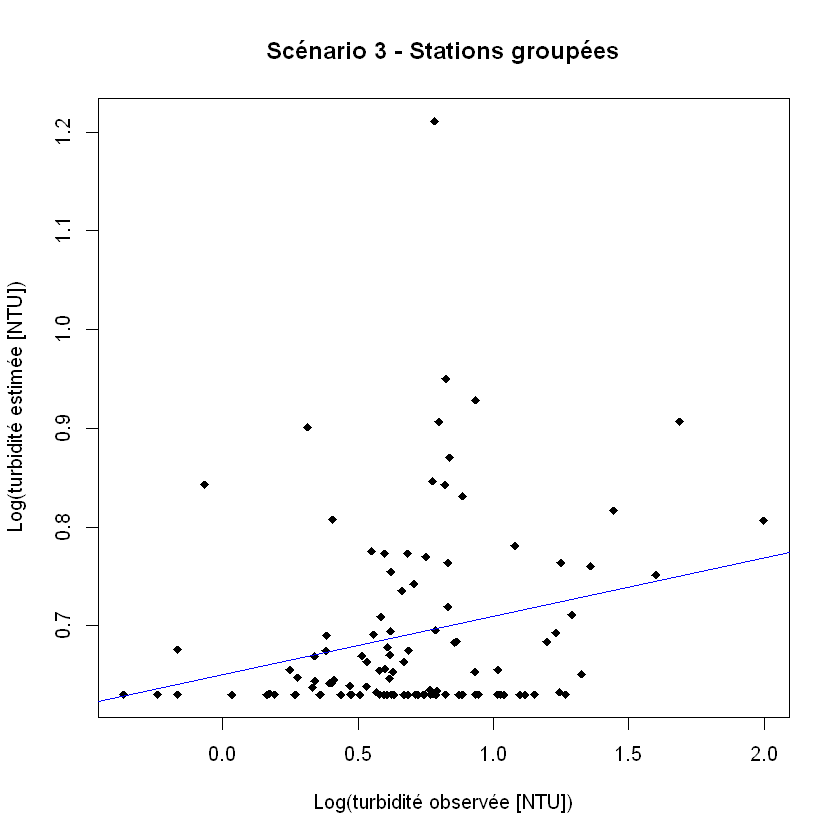

In [61]:
ybis = 0.0114333723845559 *data$Précipitations + 0.630190485603087
y1 = ybis
x1 = data$l.Turbidité
plot(x1, y1,
  ylab="Log(turbidité estimée [NTU])",
  xlab="Log(turbidité observée [NTU])",
     main = "Scénario 3 - Stations groupées",
    pch = 18)
abline(lm(y1 ~ x1), col="blue")

# Niveau 4 : débit et précipitations

# Hastière

In [62]:
library(readxl)
data <- read_excel(
    path = "Desktop\\Memoire\\bases_de_donnees\\jeux_donnees\\vi_SR_débit_précip.xlsx",
    sheet = 1, # 1 = hastière, 2 = andenne, 3 = lixhe, 5 = tout
    col_names = TRUE)
data = subset(data, select = -c(date,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12))
head(data,2)

Turbidité,Débit,Précipitations
7.188,92.46,4.6
2.969,31.33,0.0


In [63]:
data$l.Turbidité <- log10(data$Turbidité)
data$log.Débit <- log10(data$Débit)
model <- l.Turbidité ~ log.Débit + Précipitations
fit <- lm(model, data)
summ <- summary(fit)
summ
mean(summ$residuals^2)
BIC(fit)
sqrt(mean(summ$residuals^2))
anova(fit)
coefficients(fit)


Call:
lm(formula = model, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30051 -0.05467  0.00731  0.07462  0.29378 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.120452   0.111894  -1.076    0.289    
log.Débit       0.565588   0.062242   9.087 1.28e-10 ***
Précipitations  0.003497   0.002222   1.574    0.125    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1318 on 34 degrees of freedom
Multiple R-squared:  0.7093,	Adjusted R-squared:  0.6922 
F-statistic: 41.47 on 2 and 34 DF,  p-value: 7.58e-10


[1] 0.01597082

[1] -33.62358

[1] 0.1263757

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
log.Débit,1,1.39847439,1.39847439,80.464524,1.747081e-10
Précipitations,1,0.04305371,0.04305371,2.477197,1.247686e-01
Residuals,34,0.59092040,0.01738001,NA,NA


(Intercept)      log.Débit Précipitations 
  -0.120451841    0.565588150    0.003496697

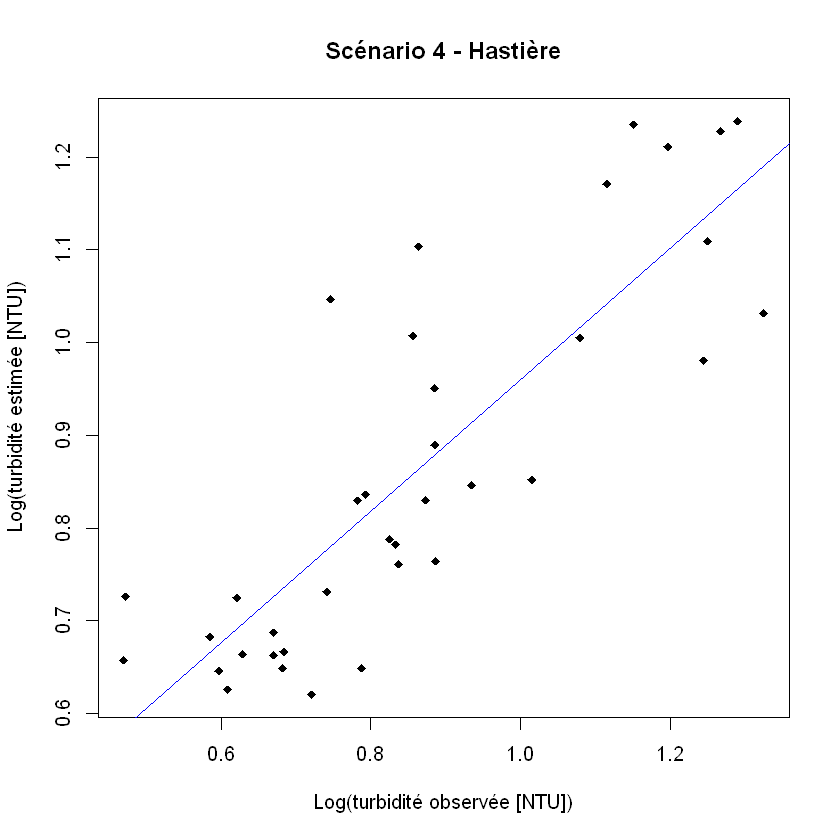

In [64]:
ybis = 0.565588150313059*data$log.Débit + 0.00349669694726127 * data$Précipitations -0.120451840600422
y = ybis
x = data$l.Turbidité
plot(x, y,
  ylab="Log(turbidité estimée [NTU])",
  xlab="Log(turbidité observée [NTU])",
     main = "Scénario 4 - Hastière",
    pch = 18)
abline(lm(y ~ x), col="blue")

# Andenne

In [67]:
library(readxl)
data <- read_excel(
    path = "Desktop\\Memoire\\bases_de_donnees\\jeux_donnees\\vi_SR_débit_précip.xlsx",
    sheet = 2, # 1 = hastière, 2 = andenne, 3 = lixhe, 5 = tout
    col_names = TRUE)
data = subset(data, select = -c(MOY,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12))
head(data,2)

Turbidité,Débit,Précipitations
4.850,129.71,3.9
5.088,73.83,9.8


In [68]:
data$l.Turbidité <- log10(data$Turbidité)
data$log.Débit <- log10(data$Débit)
model <- l.Turbidité ~ log.Débit + Précipitations
fit <- lm(model, data)
summ <- summary(fit)
summ
mean(summ$residuals^2)
BIC(fit)
sqrt(mean(summ$residuals^2))
anova(fit)
coefficients(fit)


Call:
lm(formula = model, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67427 -0.16039  0.07011  0.20819  0.56283 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -1.219555   0.304348  -4.007 0.000412 ***
log.Débit       0.959282   0.156840   6.116 1.34e-06 ***
Précipitations  0.023391   0.007349   3.183 0.003554 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3022 on 28 degrees of freedom
Multiple R-squared:  0.6386,	Adjusted R-squared:  0.6128 
F-statistic: 24.74 on 2 and 28 DF,  p-value: 6.49e-07


[1] 0.08247374

[1] 24.3566

[1] 0.2871824

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
log.Débit,1,3.5920723,3.59207229,39.33922,8.828278e-07
Précipitations,1,0.9251212,0.92512121,10.13163,3.554477e-03
Residuals,28,2.5566861,0.09131022,NA,NA


(Intercept)      log.Débit Précipitations 
   -1.21955479     0.95928170     0.02339082

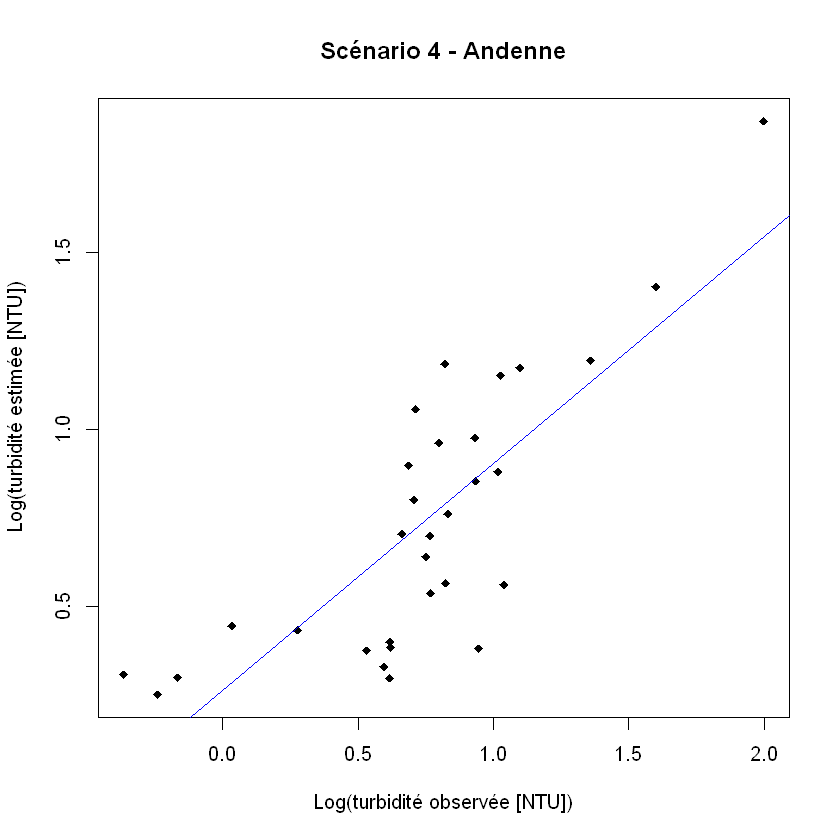

In [69]:
ybis = 0.959281702398143*data$log.Débit + 0.0233908247699005 * data$Précipitations -1.21955478829401
y = ybis
x = data$l.Turbidité
plot(x, y,
  ylab="Log(turbidité estimée [NTU])",
  xlab="Log(turbidité observée [NTU])",
     main = "Scénario 4 - Andenne",
    pch = 18)
abline(lm(y ~ x), col="blue")

# Lixhe

In [74]:
library(readxl)
data <- read_excel(
    path = "Desktop\\Memoire\\bases_de_donnees\\jeux_donnees\\vi_SR_débit_précip.xlsx",
    sheet = 3, # 1 = hastière, 2 = andenne, 3 = lixhe, 5 = tout
    col_names = TRUE)
data = subset(data, select = -c(date,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12))
head(data,2)

Turbidité,Débit,Précipitations
0.681,53.89304,4.0
0.856,55.47750,18.6


In [75]:
data$l.Turbidité <- log10(data$Turbidité)
data$log.Débit <- log10(data$Débit)
model <- l.Turbidité ~ log.Débit + Précipitations
fit <- lm(model, data)
summ <- summary(fit)
summ
mean(summ$residuals^2)
BIC(fit)
sqrt(mean(summ$residuals^2))
anova(fit)
coefficients(fit)


Call:
lm(formula = model, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.71545 -0.12508 -0.04176  0.14811  0.53905 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.255018   0.173190  -1.472 0.149347    
log.Débit       0.369601   0.090970   4.063 0.000242 ***
Précipitations  0.013888   0.006365   2.182 0.035543 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2731 on 37 degrees of freedom
Multiple R-squared:  0.4035,	Adjusted R-squared:  0.3712 
F-statistic: 12.51 on 2 and 37 DF,  p-value: 7.066e-05


[1] 0.06900779

[1] 21.32917

[1] 0.2626933

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
log.Débit,1,1.5118223,1.51182234,20.264896,6.498545e-05
Précipitations,1,0.3551602,0.35516018,4.760668,3.554345e-02
Residuals,37,2.7603116,0.07460302,NA,NA


(Intercept)      log.Débit Précipitations 
   -0.25501815     0.36960055     0.01388809

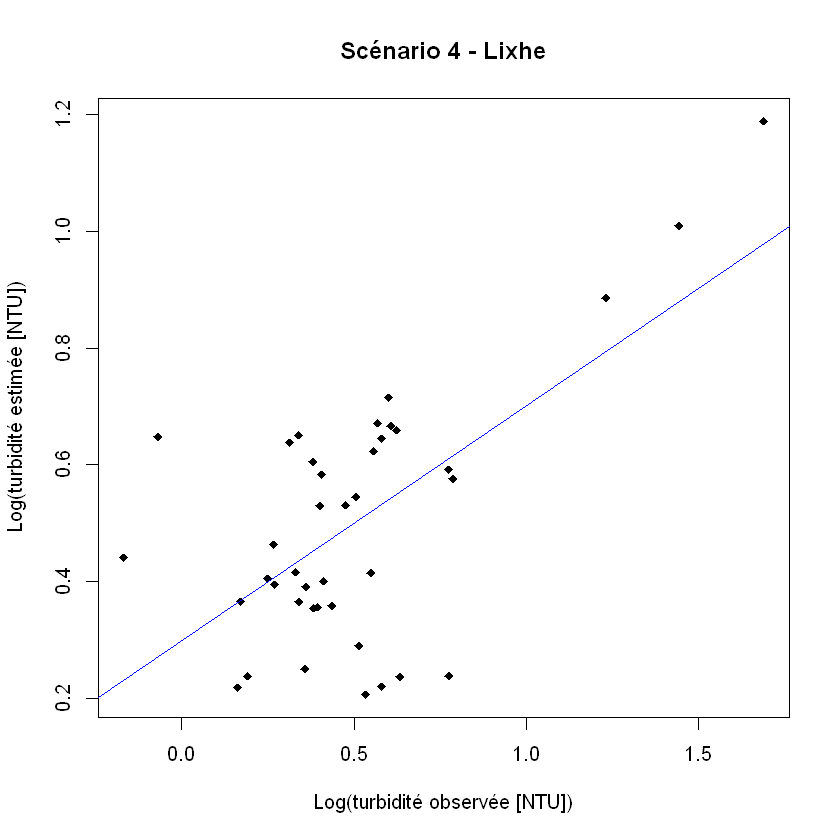

In [76]:
ybis = 0.369600545783918*data$log.Débit + 0.0138880853258189 * data$Précipitations -0.255018146964208
y = ybis
x = data$l.Turbidité
plot(x, y,
  ylab="Log(turbidité estimée [NTU])",
  xlab="Log(turbidité observée [NTU])",
     main = "Scénario 4 - Lixhe",
    pch = 18)
abline(lm(y ~ x), col="blue")

# Stations groupées

In [77]:
library(readxl)
data <- read_excel(
    path = "Desktop\\Memoire\\bases_de_donnees\\jeux_donnees\\vi_SR_débit_précip.xlsx",
    sheet = 4, # 1 = hastière, 2 = andenne, 3 = lixhe, 4 = tout
    col_names = TRUE)
data = subset(data, select = -c(date,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12))
head(data,2)

Turbidité,Débit,Précipitations
7.188,92.46,4.6
2.969,31.33,0.0


In [78]:
data$l.Turbidité <- log10(data$Turbidité)
data$log.Débit <- log10(data$Débit)
model <- l.Turbidité ~ log.Débit + Précipitations
fit <- lm(model, data)
summ <- summary(fit)
summ
mean(summ$residuals^2)
BIC(fit)
sqrt(mean(summ$residuals^2))
anova(fit)
coefficients(fit)


Call:
lm(formula = model, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.88151 -0.21363  0.05925  0.22422  0.68869 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.259516   0.141952  -1.828  0.07036 .  
log.Débit       0.486473   0.074925   6.493 2.86e-09 ***
Précipitations  0.012099   0.003766   3.213  0.00175 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3233 on 105 degrees of freedom
Multiple R-squared:  0.3286,	Adjusted R-squared:  0.3158 
F-statistic: 25.69 on 2 and 105 DF,  p-value: 8.276e-10


[1] 0.1015929

[1] 78.24685

[1] 0.3187364

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
log.Débit,1,4.290543,4.2905427,41.05956,4.272186e-09
Précipitations,1,1.078525,1.0785253,10.32125,1.746501e-03
Residuals,105,10.972035,0.1044956,NA,NA


(Intercept)      log.Débit Précipitations 
   -0.25951574     0.48647305     0.01209875

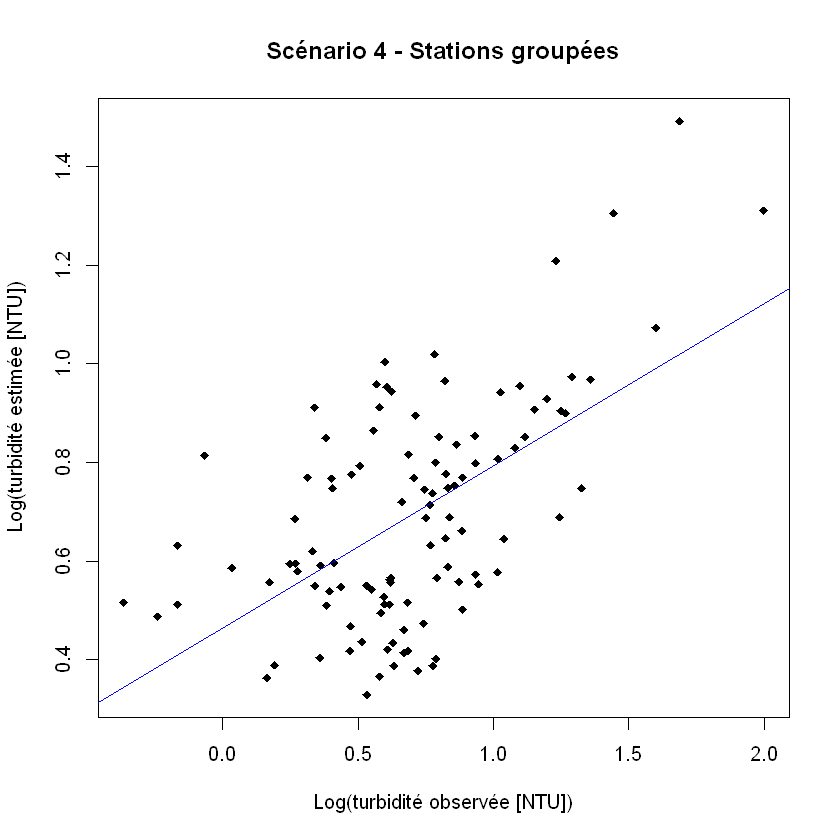

In [79]:
ybis = 0.486473053471684*data$log.Débit + 0.0120987545562194 * data$Précipitations -0.25951574116587
y = ybis
x = data$l.Turbidité
plot(x, y,
  ylab="Log(turbidité estimée [NTU])",
  xlab="Log(turbidité observée [NTU])",
     main = "Scénario 4 - Stations groupées",
    pch = 18)
abline(lm(y ~ x), col="blue")

# Niveau 5 : réflectance de surface et débit

In [100]:
library(readxl)
data <- read_excel(
    path = "Desktop\\Memoire\\bases_de_donnees\\jeux_donnees\\v_SR_débit.xlsx",
    sheet = 4, # 1 = hastière, 2 = andenne, 3 = lixhe, 4 = tout
    col_names = TRUE)
head(data,2)

date,Turbidité,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,Débit
2017-04-03,7.188,53.5,174.5,354.5,231.5,204.0,110.5,125.5,132.0,129,103,144.5,101.0,92.46
2017-05-26,2.969,294.0,228.5,305.0,193.5,150.5,37.0,51.5,54.5,71,190,224.0,182.5,31.33


In [101]:
data$log.Débit <- log10(data$Débit)

In [86]:
#hastière
data <- mutate(data,
               P1 = 0.38 * B1 + 0.44 * B2 + 0.44 * B3 + 0.44 * B4 + 0.43 * B5 + 0.30 * log.Débit,
               P2 = 0.40 * B1 + 0.20 * B2 - 0.01 * B3 - 0.04 * B4 + 0.10 * B5 - 0.89 * log.Débit,
               P3 = - 0.82 * B1 + 0.19 * B2 + 0.32 * B3 + 0.26 * B4 + 0.15 * B5 - 0.32 * log.Débit,
               P4 = 0.05 * B1 + 0.47 * B2 + 0.42 * B3 - 0.28 * B4 - 0.74 * B5 + 0.05 * log.Débit)

In [91]:
#andenne
data <- mutate(data,
               P1 = -0.35 * B1 - 0.43 * B2 - 0.44 * B3 - 0.44 * B4 - 0.43 * B5 - 0.35 * log.Débit,
               P2 = 0.71 * B1 + 0.15 * B2 - 0.04 * B3 - 0.11 * B4 - 0.02 * B5 - 0.68 * log.Débit,
               P3 = 0.44 * B1 + 0.12 * B2 + 0.00 * B3 - 0.34 * B4 - 0.60 * B5 + 0.56 * log.Débit,
               P4 = 0.42 * B1 - 0.78 * B2 - 0.22 * B3 + 0.18 * B4 + 0.28 * B5 + 0.25 * log.Débit)

In [97]:
#lixhe
data <- mutate(data,
               P1 = -0.37 * B1 - 0.44 * B2 - 0.44 * B3 - 0.44 * B4 - 0.42 * B5 - 0.34 * log.Débit,
               P2 = 0.59 * B1 + 0.15 * B2 - 0.03 * B3 - 0.77 * B4 + 0.07 * B5 - 0.79 * log.Débit,
               P3 = 0.50 * B1 + 0.23 * B2 + 0.01 * B3 - 0.38 * B4 - 0.62 * B5 + 0.40 * log.Débit,
               P4 = 0.47 * B1 - 0.46 * B2 - 0.59 * B3 + 0.07 * B4 + 0.36 * B5 + 0.31 * log.Débit)

In [102]:
#tout
data <- mutate(data,
               P1 = 0.38 * B1 + 0.44 * B2 + 0.44 * B3 + 0.45 * B4 + 0.43 * B5 + 0.28 * log.Débit,
               P2 = 0.47 * B1 + 0.13 * B2 + 0.03 * B3 - 0.06 * B4 + 0.03 * B5 - 0.87 * log.Débit,
               P3 = - 0.68 * B1 - 0.10 * B2 + 0.08 * B3 + 0.35 * B4 + 0.51 * B5 - 0.38 * log.Débit,
               P4 = 0.38 * B1 - 0.46 * B2 - 0.57 * B3 + 0.09 * B4 + 0.54 * B5 + 0.13 * log.Débit)

In [103]:
data$l.Turbidité <- log10(data$Turbidité)
model <- l.Turbidité ~ P1 + P2 + P3
fit <- lm(model, data)
summ <- summary(fit)
summ
mean(summ$residuals^2)
BIC(fit)
sqrt(mean(summ$residuals^2))
anova(fit)
coefficients(fit)


Call:
lm(formula = model, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.01334 -0.16544  0.03237  0.19442  0.75515 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.2971781  0.0671027   4.429 2.35e-05 ***
P1           0.0022844  0.0009856   2.318   0.0224 *  
P2          -0.0065511  0.0033285  -1.968   0.0517 .  
P3          -0.0013274  0.0015671  -0.847   0.3989    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3155 on 104 degrees of freedom
Multiple R-squared:  0.3663,	Adjusted R-squared:  0.348 
F-statistic: 20.04 on 3 and 104 DF,  p-value: 2.512e-10


[1] 0.09588164

[1] 76.68018

[1] 0.3096476

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
P1,1,3.98711508,3.98711508,40.0435782,6.372992e-09
P2,1,1.92733768,1.92733768,19.3567267,2.630447e-05
P3,1,0.07143305,0.07143305,0.7174197,3.989365e-01
Residuals,104,10.35521765,0.09956940,NA,NA


(Intercept)           P1           P2           P3 
 0.297178114  0.002284387 -0.006551055 -0.001327352

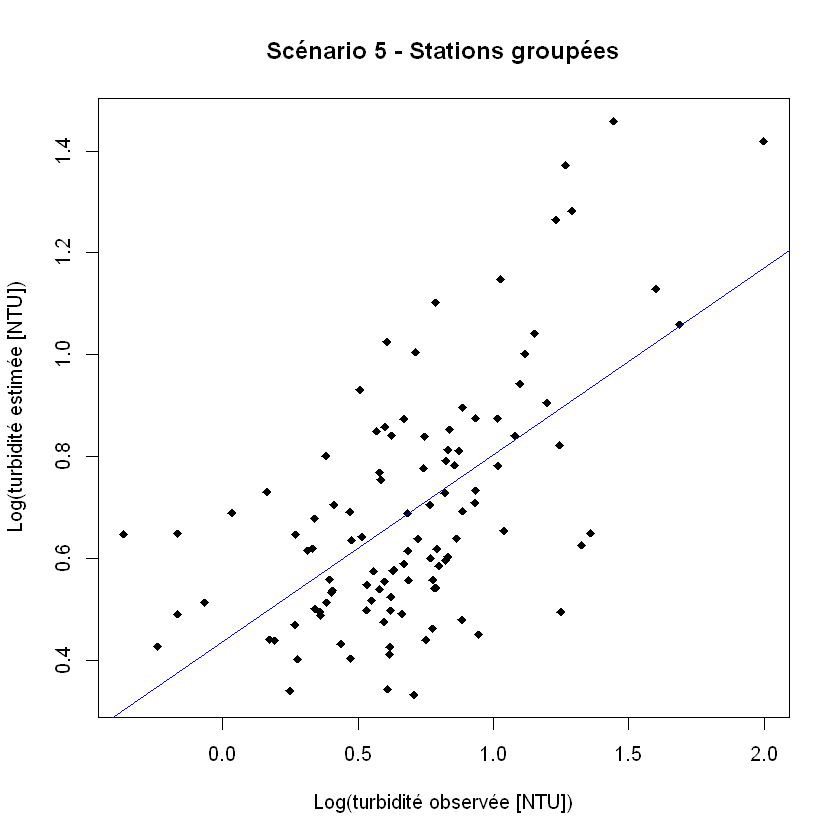

In [104]:
ybis = 0.00228438686934449*data$P1 -0.00655105450762958 * data$P2 -0.00132735238359448* data$P3 + 0.297178113588762
y = ybis
x = data$l.Turbidité
plot(x, y,
  ylab="Log(turbidité estimée [NTU])",
  xlab="Log(turbidité observée [NTU])",
     main = "Scénario 5 - Stations groupées",
    pch = 18)
abline(lm(y ~ x), col="blue")

# Niveau 6 : réflectance, débit et précipitations

In [121]:
library(readxl)
data <- read_excel(
    path = "Desktop\\Memoire\\bases_de_donnees\\jeux_donnees\\vi_SR_débit_précip.xlsx",
    sheet = 4, # 1 = hastière, 2 = andenne, 3 = lixhe, 4 = tout
    col_names = TRUE)
head(data,2)

date,Turbidité,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,Débit,Précipitations
2017-04-03,7.188,53.5,174.5,354.5,231.5,204.0,110.5,125.5,132.0,129,103,144.5,101.0,92.46,4.6
2017-05-26,2.969,294.0,228.5,305.0,193.5,150.5,37.0,51.5,54.5,71,190,224.0,182.5,31.33,0.0


In [122]:
data$log.Débit <- log10(data$Débit)

In [107]:
#hastière
data <- mutate(data,
               P1 = 0.38*B1 + 0.44*B2 + 0.44*B3 + 0.44*B4 + 0.44*B5 + 0.30 * log.Débit - 0.02*Précipitations,
               P2 = 0.23*B1 + 0.10*B2 + 0.01*B3 - 0.03*B4 + 0.04*B5 - 0.41 * log.Débit + 0.87*Précipitations,
               P3 = -0.29*B1 - 0.18*B2 + 0.01*B3 + 0.00*B4 - 0.11*B5 + 0.80 * log.Débit + 0.48*Précipitations,
               P4 = -0.83*B1 + 0.19*B2 + 0.33*B3 + 0.25*B4 + 0.14*B5 - 0.28 * log.Débit + 0.06*Précipitations,
               P5 = 0.06*B1 + 0.47*B2 + 0.42*B3 - 0.23*B4 - 0.74*B5 + 0.04 * log.Débit - 0.03*Précipitations)

In [112]:
#andenne
data <- mutate(data,
               P1 = - 0.35*B1 - 0.43*B2 - 0.44*B3 - 0.44*B4 - 0.42*B5 - 0.35 * log.Débit + 0.04*Précipitations,
               P2 = 0.38*B1 + 0.10*B2 - 0.02*B3 - 0.14*B4 - 0.13*B5 - 0.24 * log.Débit - 0.87*Précipitations,
               P3 = 0.52*B1 + 0.07*B2 - 0.05*B3 + 0.03*B4 + 0.16*B5 - 0.72 * log.Débit + 0.41*Précipitations,
               P4 = -0.59*B1 - 0.04*B2 + 0.05*B3 + 0.30*B4 + 0.53*B5 - 0.45 * log.Débit - 0.26*Précipitations,
               P5 = -0.33*B1 + 0.80*B2 + 0.21*B3 - 0.21*B4 - 0.35*B5 - 0.21 * log.Débit + 0.08*Précipitations)

In [117]:
#lixhe
data <- mutate(data,
               P1 = - 0.37*B1 - 0.43*B2 - 0.43*B3 - 0.43*B4 - 0.42*B5 - 0.33 * log.Débit - 0.13*Précipitations,
               P2 = 0.05*B1 + 0.07*B2 + 0.14*B3 - 0.01*B4 - 0.00*B5 + 0.07 * log.Débit - 0.98*Précipitations,
               P3 = 0.59*B1 + 0.15*B2 - 0.03*B3 - 0.08*B4 + 0.07*B5 - 0.79 * log.Débit - 0.02*Précipitations,
               P4 = -0.51*B1 - 0.22*B2 + 0.01*B3 + 0.38*B4 + 0.62*B5 - 0.41 * log.Débit - 0.07*Précipitations,
               P5 = 0.47*B1 - 0.48*B2 - 0.56*B3 + 0.06*B4 + 0.38*B5 + 0.30 * log.Débit - 0.07*Précipitations)

In [123]:
#tout
data <- mutate(data,
               P1 = 0.38*B1 + 0.44*B2 + 0.44*B3 + 0.46*B4 + 0.43*B5 + 0.28 * log.Débit + 0.04*Précipitations,
               P2 = 0.08*B1 + 0.00*B2 - 0.03*B3 + 0.01*B4 + 0.03*B5 - 0.25 * log.Débit + 0.97*Précipitations,
               P3 = -0.47*B1 - 0.14*B2 - 0.04*B3 + 0.07*B4 - 0.02*B5 + 0.83 * log.Débit + 0.25*Précipitations,
               P4 = 0.68*B1 + 0.10*B2 - 0.09*B3 - 0.34*B4 - 0.50*B5 + 0.39 * log.Débit + 0.06*Précipitations,
               P5 = -0.37*B1 + 0.46*B2 + 0.56*B3 - 0.09*B4 - 0.55*B5 - 0.12 * log.Débit + 0.04*Précipitations)

In [124]:
data$l.Turbidité <- log10(data$Turbidité)
model <- l.Turbidité ~ P1 + P2 + P3 + P4
fit <- lm(model, data)
summ <- summary(fit)
summ
mean(summ$residuals^2)
BIC(fit)
sqrt(mean(summ$residuals^2))
anova(fit)
coefficients(fit)


Call:
lm(formula = model, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.96002 -0.16185  0.00555  0.17674  0.71708 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.256159   0.065657   3.901 0.000171 ***
P1          0.003835   0.001091   3.514 0.000657 ***
P2          0.007300   0.003179   2.296 0.023685 *  
P3          0.012729   0.003762   3.384 0.001013 ** 
P4          0.003933   0.001784   2.205 0.029670 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3032 on 103 degrees of freedom
Multiple R-squared:  0.4207,	Adjusted R-squared:  0.3982 
F-statistic:  18.7 on 4 and 103 DF,  p-value: 1.396e-11


[1] 0.08765117

[1] 71.66935

[1] 0.2960594

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
P1,1,3.997367062,3.997367062,43.49404453,1.863141e-09
P2,1,0.004868178,0.004868178,0.05296906,8.184316e-01
P3,1,2.425646746,2.425646746,26.39266946,1.326068e-06
P4,1,0.446895401,0.446895401,4.86252280,2.966993e-02
Residuals,103,9.466326065,0.091906078,NA,NA


(Intercept)          P1          P2          P3          P4 
0.256158718 0.003835346 0.007300207 0.012728795 0.003933010

[1] -0.98602279 -1.69951076 -0.99214562 -1.80563036 -2.88724533 -1.82808295
  [7] -2.10119613 -4.43185097 -3.64016831 -4.18292966 -5.95321700 -2.43319723
 [13] -3.15688348 -1.75936142 -2.37255753 -3.11895857 -2.90014065 -4.29443300
 [19] -1.87457569 -3.54377710 -1.97899606 -1.83336109 -1.83273364 -2.19298040
 [25] -2.61344595 -4.09797067 -2.13830633 -2.44912447 -1.60659539 -1.83353142
 [31] -1.94147910 -1.77601810 -1.78097070 -1.95559101 -1.59224040 -0.47217073
 [37] -1.91775318 -1.95645552 -0.22040100 -0.09592313 -0.65082370 -0.26780938
 [43] -1.04079257 -0.33165515 -1.21779677 -3.35100413 -1.30124011 -3.13260382
 [49] -3.96301981 -2.59452777 -1.56538390 -2.24057300 -2.23411598 -0.77217946
 [55] -1.53587739 -1.71291932 -0.97603102 -2.30332251 -1.52859007 -1.76218016
 [61] -1.42710901 -0.86375869 -1.23902956 -1.39462435 -0.33949592 -1.12762376
 [67] -0.12898318 -0.39554741 -1.37867510 -2.57424998 -0.72680828 -0.61288005
 [73] -0.41075834 -0.58553024 -0.75298945 -0.38226799 -3.27788331 -3.45839839
 [79] -3.46162865 -4.06757742 -0.87564605 -1.64985534 -3.31225826 -0.73469700
 [85] -1.98555863 -1.97465232 -3.80784280 -2.09008203 -1.86303860 -1.59852030
 [91] -3.68188326 -0.58375420 -3.23595007 -0.61945074 -1.29827185 -1.21419493
 [97] -1.68605859 -0.86861103 -0.99533250 -1.51390745 -1.19755429 -0.61748981
[103] -0.82005569 -0.57839168 -1.09527165 -1.69490102 -0.99620730  0.06188704

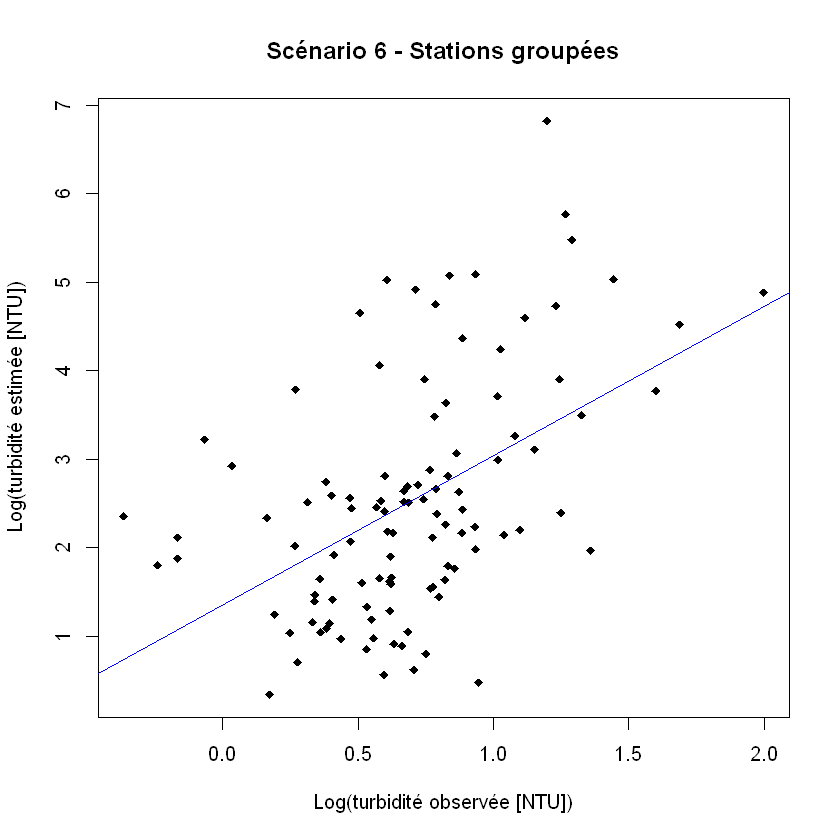

In [125]:
ybis = 0.0038353463512362 *data$P1 + 0.00730020690423467 * data$P2 
    + 0.0127287954790126 * data$P3 + 0.00393301040354699 * data$P4 + 0.256158718423494
y = ybis
x = data$l.Turbidité
plot(x, y,
  ylab="Log(turbidité estimée [NTU])",
  xlab="Log(turbidité observée [NTU])",
     main = "Scénario 6 - Stations groupées",
    pch = 18)
abline(lm(y ~ x), col="blue")